In [1]:
from skimage.io import imread, imshow, imshow_collection, show
import numpy as np
import matplotlib.pylab as plt
from skimage.morphology import binary_dilation, binary_erosion
from skimage import data

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['plt', 'imshow', 'show', 'imread']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
def generate_structure_ch():
    A = []
    temp1 = np.array([[1, 1, 1], [0, 0, 1], [0, 0, 0]])
    for i in range(4):
        A.append(np.rot90(temp1, i))
    temp1 = np.array([[1, 1, 1], [1, 0, 0], [0, 0, 0]])
    for i in range(4):
        A.append(np.rot90(temp1, i))
    B = np.zeros((3,3))
    B[1,1] = 1
    return A, B


def generate_structure_sk():
    A = []
    B = []
    tempA = np.array([[1, 1, 1], [0, 1, 0], [0, 0, 0]])
    tempB = np.array([[0, 0, 0], [0, 0, 0], [1, 1, 1]])
    for i in range(4):
        A.append(np.rot90(tempA, i))
        B.append(np.rot90(tempB, i))
    tempA = np.array([[0, 1, 0], [0, 1, 1], [0, 0, 0]])
    tempB = np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0]])
    for i in range(4):
        A.append(np.rot90(tempA, i))
        B.append(np.rot90(tempB, i))
    return A, B

In [4]:
def magic_operator(image, T):
    if np.logical_and(T[0], T[1]).any():
        raise ValueError('Wrong structure elements!!!')
    temp1 = binary_erosion(image, T[0])
    temp2 = binary_erosion(image == 0, T[1])
    return np.logical_and(temp1, temp2)


def thickening(image, T):
    return np.logical_or(image, magic_operator(image, T))


def thinning(image, T):
    return np.logical_xor(image, magic_operator(image, T))

In [5]:
def convex_hull_iter(image):
    A, B = generate_structure_ch()
    hull = image.copy()
    for i in range(len(A)):
        hull = thickening(hull, tuple([A[i], B]))
    return hull


def skeleton_iter(image):
    A, B = generate_structure_sk()
    skel = image.copy()
    for i in range(len(A)):
        skel = thinning(skel, tuple([A[i], B[i]]))
    return skel

In [6]:
def convex_hull(image):
    hull_prev = convex_hull_iter(image)
    hull_next = convex_hull_iter(hull_prev)
    while np.logical_xor(hull_prev, hull_next).any():
        hull_prev = hull_next.copy()
        hull_next = convex_hull_iter(hull_prev)
    return hull_next


def skeleton(image):
    skel_prev = skeleton_iter(image)
    skel_next = skeleton_iter(skel_prev)
    while np.logical_xor(skel_prev, skel_next).any():
        skel_prev = skel_next.copy()
        skel_next = skeleton_iter(skel_prev)
    return skel_next

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


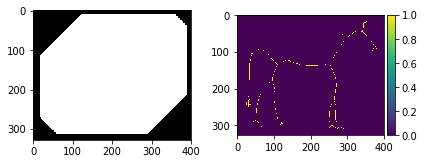

In [7]:
horse = data.horse() == 0
imshow_collection([convex_hull(horse), skeleton(horse)])

In [8]:
def magic_operator_ch(image, T):
    if np.logical_and(T[0], T[1]).any():
        raise ValueError('Wrong structure elements!!!')
    temp1 = binary_erosion(image, T[0])
    return np.logical_and(temp1, image == 0)


def thickening_ch(image, T):
    return np.logical_or(image, magic_operator_ch(image, T))

In [9]:
def convex_hull_fast_iter(image):
    A, B = generate_structure_ch()
    hull = image.copy()
    for i in range(len(A)):
        hull = thickening_ch(hull, tuple([A[i], B]))
    return hull

In [10]:
def convex_hull_fast(image):
    hull_prev = convex_hull_fast_iter(image)
    hull_next = convex_hull_fast_iter(hull_prev)
    while np.logical_xor(hull_prev, hull_next).any():
        hull_prev = hull_next.copy()
        hull_next = convex_hull_fast_iter(hull_prev)
    return hull_next

/usr/local/lib/python3.5/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


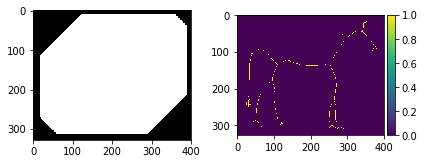

In [11]:
imshow_collection([convex_hull_fast(horse), skeleton(horse)])

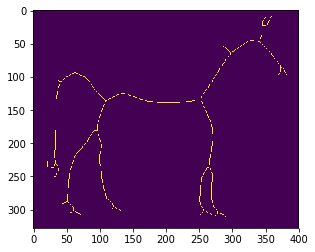

In [12]:
imshow(skeleton(horse))